In [1]:
import pandas as pd
import numpy as np

from analyze_src.pre_inspection_analysis import (
    DataInspector, 
    InfoInspection, 
    DescribeInspection, 
    DescribeCategoricalInspection, 
    MissingValuesInspection, 
    ValueCountsInspection 
)

from analyze_src.preprocess import (
    DataTransformer,
    ImputeByGroupMaxStrategy,
    ImputeWithDefaultValueStrategy,
    DeleteRowsWithMissingValuesStrategy,
    StandardizeValuesStrategy
)

from analyze_src.univeriate_analysis import(
    UniveriateAnalyzer,
    CategoricalUniveriateAnalysis,
    NumericalUniveriateAnalysis
)

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
data_path = "/Users/mac/Desktop/My-Data-Science-Project/BigMart_Project/dataset/Train.csv"
data = pd.read_csv(data_path)

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
inspector = DataInspector(data)

inspector.add_strategy(InfoInspection())
inspector.add_strategy(DescribeInspection())
inspector.add_strategy(DescribeCategoricalInspection())
inspector.add_strategy(MissingValuesInspection())

inspector.add_strategy(ValueCountsInspection(columns=["Item_Fat_Content", "Item_Type", "Outlet_Size", 
                                                      "Outlet_Location_Type", "Outlet_Identifier","Outlet_Type"]))

inspector.inspect()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


Numeric Columns Descri

In [5]:
# Initialize DataTransformer with the first strategy
transformer = DataTransformer(ImputeByGroupMaxStrategy(target_column='Item_Weight', group_column='Item_Identifier'))
data = transformer.apply_transformation(data)

# Apply the next transformation strategy for filling missing values in Outlet_Size
transformer.set_strategy(ImputeWithDefaultValueStrategy(target_column='Outlet_Size', default_value="Small"))
data = transformer.apply_transformation(data)

# Apply the deletion of remaining missing values
transformer.set_strategy(DeleteRowsWithMissingValuesStrategy(target_column='Item_Weight'))
data = transformer.apply_transformation(data)

# Standardize Item_Fat_Content values
replacements = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
transformer.set_strategy(StandardizeValuesStrategy(target_column='Item_Fat_Content', replacements=replacements))
data = transformer.apply_transformation(data)

# Display final transformed DataFrame
data.head()

2024-11-01 11:16:21,134 - INFO - Applying data transformation strategy.
2024-11-01 11:16:21,136 - INFO - Imputing missing values in 'Item_Weight' by max of 'Item_Identifier' groups.
2024-11-01 11:16:21,141 - INFO - Switching data transformation strategy.
2024-11-01 11:16:21,142 - INFO - Applying data transformation strategy.
2024-11-01 11:16:21,142 - INFO - Imputing missing values in 'Outlet_Size' with default value 'Small'.
2024-11-01 11:16:21,145 - INFO - Switching data transformation strategy.
2024-11-01 11:16:21,147 - INFO - Applying data transformation strategy.
2024-11-01 11:16:21,148 - INFO - Deleting rows with missing values in 'Item_Weight'.
2024-11-01 11:16:21,152 - INFO - Switching data transformation strategy.
2024-11-01 11:16:21,153 - INFO - Applying data transformation strategy.
2024-11-01 11:16:21,153 - INFO - Standardizing values in 'Item_Fat_Content' with replacements: {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}.
/Users/mac/Desktop/My-Data-Science-Project

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
sanity_check = DataInspector(data)

sanity_check.add_strategy(MissingValuesInspection())

sanity_check.add_strategy(ValueCountsInspection(columns=["Item_Fat_Content", "Item_Type", "Outlet_Size", 
                                                      "Outlet_Location_Type", "Outlet_Identifier","Outlet_Type"]))

sanity_check.inspect()

Missing Values Count:
Series([], dtype: int64)


Value count for Item_Fat_Content
Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64


Value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count for Outlet_Size
Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64


Value count for Outlet_Location_Type
Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64


Value count for Outlet_Identifier
OUT013    932
OUT027    932
OUT049    930
O

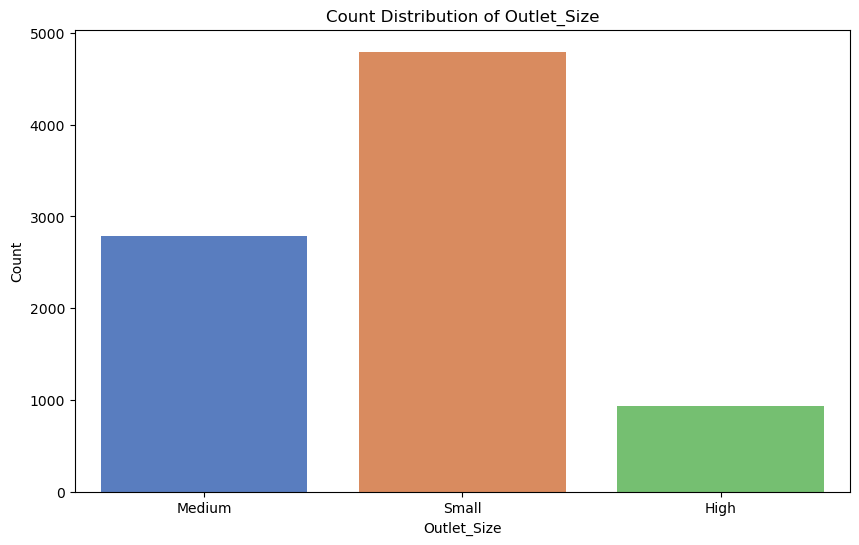

In [7]:
univeriate_analyzer = UniveriateAnalyzer(CategoricalUniveriateAnalysis())
univeriate_analyzer.execute_analysis(data, "Outlet_Size")

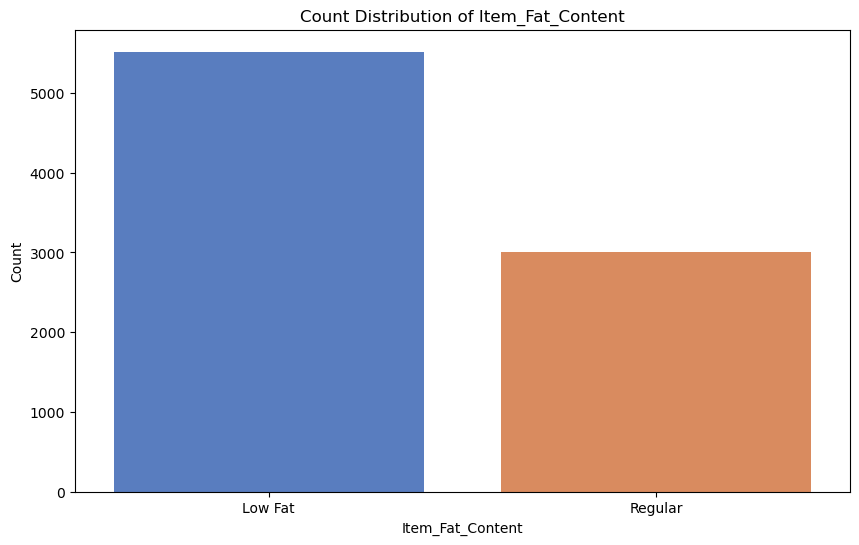

In [8]:
univeriate_analyzer.set_strategy(CategoricalUniveriateAnalysis())
univeriate_analyzer.execute_analysis(data, "Item_Fat_Content")

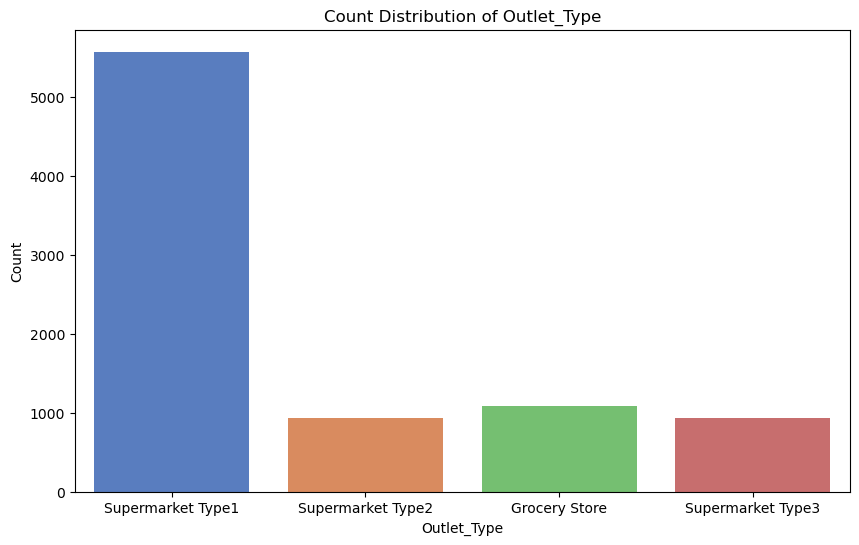

In [9]:
univeriate_analyzer.set_strategy(CategoricalUniveriateAnalysis())
univeriate_analyzer.execute_analysis(data, "Outlet_Type")

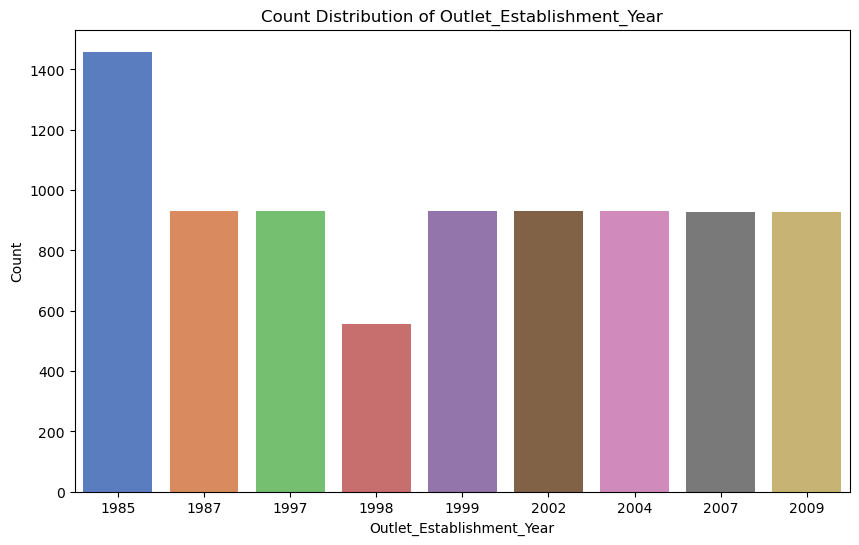

In [10]:
univeriate_analyzer.set_strategy(CategoricalUniveriateAnalysis())
univeriate_analyzer.execute_analysis(data, "Outlet_Establishment_Year")

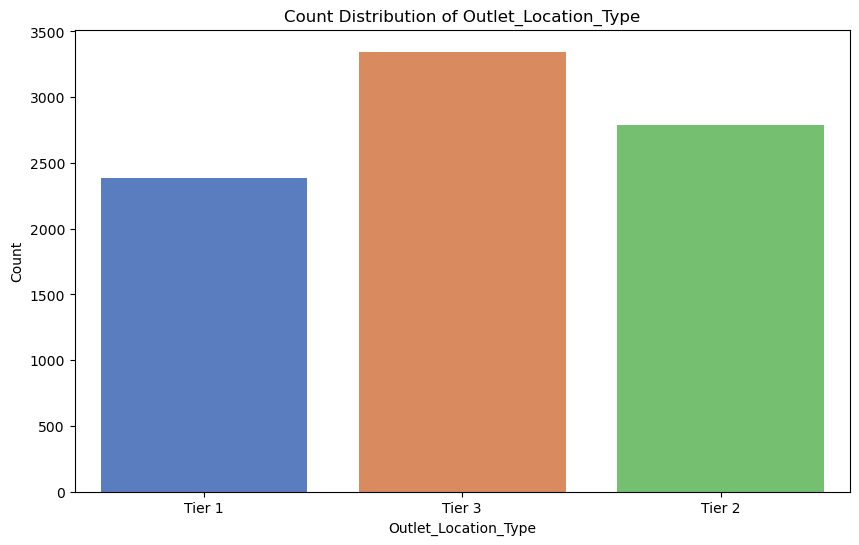

In [11]:
univeriate_analyzer.set_strategy(CategoricalUniveriateAnalysis())
univeriate_analyzer.execute_analysis(data, "Outlet_Location_Type")

<Figure size 1000x600 with 0 Axes>

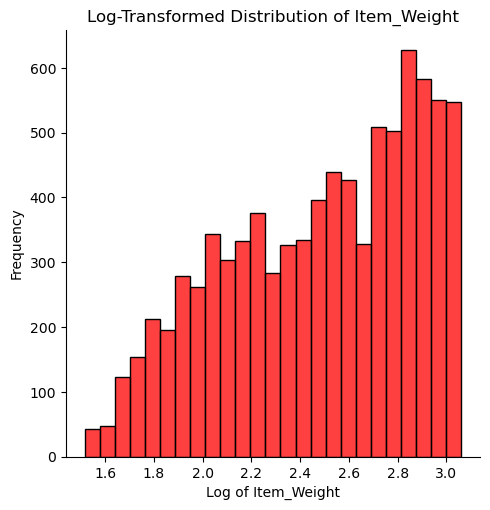

In [12]:
univeriate_analyzer_numeric = UniveriateAnalyzer(NumericalUniveriateAnalysis())
univeriate_analyzer_numeric.execute_analysis(data, "Item_Weight", use_log_transform="log")

<Figure size 1000x600 with 0 Axes>

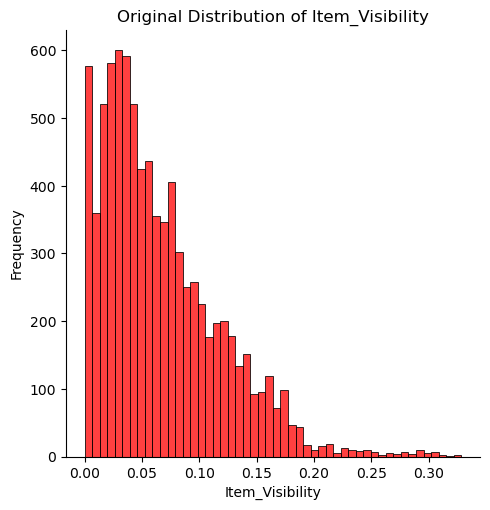

In [13]:
univeriate_analyzer_numeric.set_strategy(NumericalUniveriateAnalysis())
univeriate_analyzer_numeric.execute_analysis(data, "Item_Visibility")

<Figure size 1000x600 with 0 Axes>

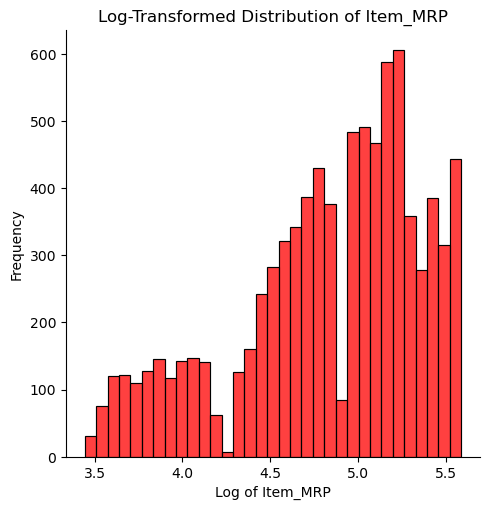

In [15]:
univeriate_analyzer_numeric.set_strategy(NumericalUniveriateAnalysis())
univeriate_analyzer_numeric.execute_analysis(data, "Item_MRP", use_log_transform="log")